# Data Pre-analysis

In [1]:
%matplotlib inline

import os
from pprint import pprint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


DIR_DATA =  os.path.join('..', 'data')

In [2]:
df_ratings = pd.read_csv(os.path.join(DIR_DATA, 'ratings_pub.csv'))
df_movies = pd.read_csv(os.path.join(DIR_DATA, 'movies_pub.csv'))
df_genome = pd.read_csv(os.path.join(DIR_DATA, 'genome_pub.csv'))
df_tags = pd.read_csv(os.path.join(DIR_DATA, 'tags_pub.csv'))

## ratings

* User Ids: MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).
* Movie Ids: Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).
* Ratings Data File Structure:
    * Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
    * Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [3]:
df_ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


Ratings Distribution

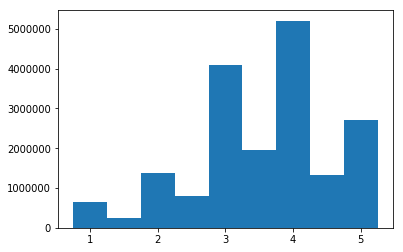

In [4]:
plt.hist(df_ratings['rating'], bins=[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
plt.show()

Rating Distribution on Timestamps

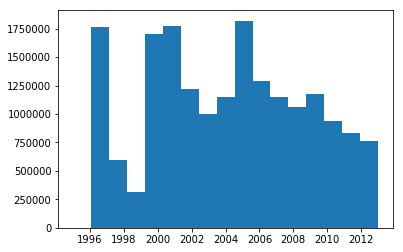

In [5]:
df_ratings['datetime'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
plt.hist(df_ratings['datetime'], bins=17)
plt.show()

Count of userId

In [6]:
np.unique(df_ratings['userId']).shape[0]

128722

Count of movieId

In [7]:
np.unique(df_ratings['movieId']).shape[0]

19551

Covered density

In [8]:
num_userId = 128722
num_movieId = 19551
density = df_ratings.shape[0] / (num_userId * num_movieId)
print('{} %'.format(density * 100))

0.7372581625497897 %


## movies

Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

In [9]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [10]:
df_movies_refine = df_movies.copy()
df_movies_refine['year'] = ((df_movies_refine['title'].str.extract(r'\((....)\) *$'))[0].astype('float32'))
df_movies_refine = df_movies_refine.dropna()
df_movies_refine['year'] = df_movies_refine['year'].astype('int32')
df_movies_refine['title'] = (df_movies_refine['title'].str.extract(r'^(.*) \(....\) *$'))[0]
df_movies_refine['genres'] = df_movies_refine['genres'].str.split('|')

df_movies_refine

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
5,6,Heat,"[Action, Crime, Thriller]",1995
6,7,Sabrina,"[Comedy, Romance]",1995
7,8,Tom and Huck,"[Adventure, Children]",1995
8,9,Sudden Death,[Action],1995
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995


Movie distribution on years

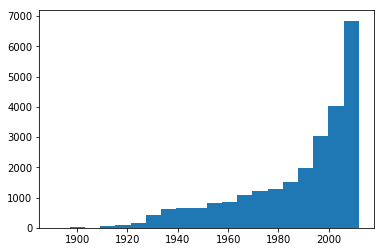

In [11]:
plt.hist(df_movies_refine.year, bins=20)
plt.show()

Count of genres

In [12]:
genre_count = dict()
for index, series in df_movies_refine.iterrows():
    for genre in series['genres']:
        genre_count[genre] = genre_count.get(genre, 0) + 1
pprint(genre_count)

{'(no genres listed)': 205,
 'Action': 3265,
 'Adventure': 2176,
 'Animation': 939,
 'Children': 1065,
 'Comedy': 7851,
 'Crime': 2765,
 'Documentary': 2157,
 'Drama': 12541,
 'Fantasy': 1324,
 'Film-Noir': 329,
 'Horror': 2446,
 'IMAX': 149,
 'Musical': 1002,
 'Mystery': 1430,
 'Romance': 3927,
 'Sci-Fi': 1611,
 'Thriller': 3853,
 'War': 1160,
 'Western': 664}


Kinds of genres

In [13]:
len(genre_count)

20

## genome

This data set includes a current copy of the Tag Genome.

[genome-paper](http://files.grouplens.org/papers/tag_genome.pdf)

The tag genome is a data structure that contains tag relevance scores for movies. The structure is a dense matrix: each movie in the genome has a value for every tag in the genome.

As described in [this article](http://files.grouplens.org/papers/tag_genome.pdf), the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

In [14]:
df_genome

,movieId,tagId,relevance,tag
0,1,1,0.02500,007
1,1,2,0.02500,007 (series)
2,1,3,0.05775,18th century
3,1,4,0.09675,1920s
4,1,5,0.14675,1930s
5,1,6,0.21700,1950s
6,1,7,0.06700,1960s
7,1,8,0.26275,1970s
8,1,9,0.26200,1980s
9,1,10,0.03200,19th century


Genome tag relevance distribution

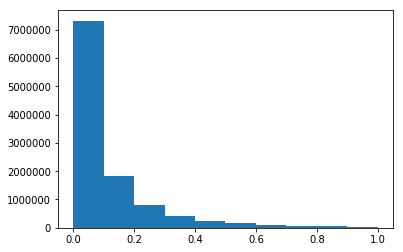

In [15]:
plt.hist(df_genome['relevance'])
plt.show()

## tags

All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [16]:
df_tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,27803,Oscar (Best Foreign Language Film),1305008715
2,65,27866,New Zealand,1304957153
3,65,48082,surreal,1304958354
4,65,48082,unusual,1304958359
5,65,58652,cute,1304957612
6,65,58652,emotional,1304957608
7,65,58652,girls who play boys,1304957403
8,65,58652,Stephen Chow,1304957388
9,121,778,dark comedy,1300852846


Tags distribution on time

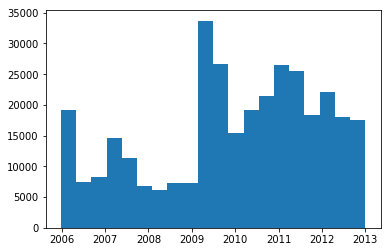

In [17]:
df_tags['datetime'] = pd.to_datetime(df_tags['timestamp'], unit='s')
plt.hist(df_tags['datetime'], bins=20)
plt.show()